# Reading data

In [2]:
import json
import numpy as np

In [3]:
with open('data.json', 'r') as f:
    data = json.load(f)

In [4]:
len(data)

39774

In [5]:
import pandas as pd

In [6]:
data[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [7]:
df = pd.DataFrame(data)

In [8]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [9]:
# Получим список уникальных ингредиентов
unique_ingredients = []
for i, item in enumerate(data):
    for ingredient in item['ingredients']:
        if ingredient not in unique_ingredients:
            unique_ingredients.append(ingredient)
len(unique_ingredients)

6714

In [10]:
from tqdm import tqdm
new_df = pd.DataFrame(columns=['id', 'cuisine'] + unique_ingredients)
new_df[['id', 'cuisine']] = df[['id', 'cuisine']]


for i in tqdm(range(len(df))):
    for ingredient in df.loc[i, 'ingredients']:
        new_df.loc[i, ingredient] = 1
    # print(i)
new_df

100%|██████████| 39774/39774 [03:45<00:00, 176.44it/s]


,id,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,LiptonВ® Iced Tea Brew Family Size Tea Bags,Hidden ValleyВ® Greek Yogurt Original RanchВ® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,10259,greek,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25693,southern_us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20130,filipino,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22213,indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13162,indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39770,11462,italian,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39771,2238,irish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39772,41882,chinese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
new_df = new_df.fillna(0)

In [17]:
new_df.to_csv('preprocessed.csv', index=False)

# Read preprocessed data

In [15]:
import pandas as pd
df = pd.read_csv('preprocessed.csv')
df = df.drop('id', axis=1)
df.head()

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,LiptonВ® Iced Tea Brew Family Size Tea Bags,Hidden ValleyВ® Greek Yogurt Original RanchВ® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_df = df.drop('cuisine', axis=1)
y_df = df.cuisine

In [164]:
y_df.value_counts()

cuisine
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: count, dtype: int64

<Axes: ylabel='count'>

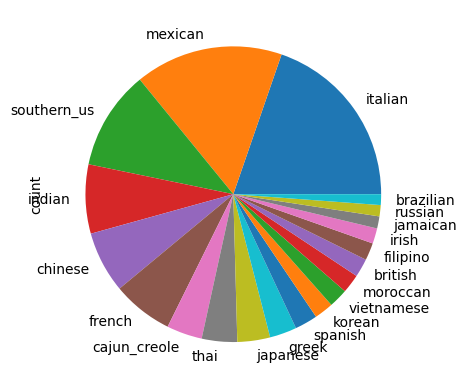

In [165]:
y_df.value_counts().plot.pie()

In [ ]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'All cuisines'}>

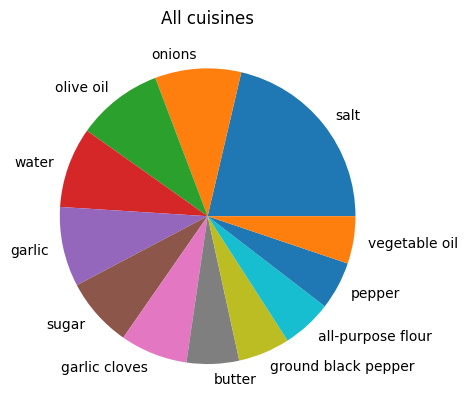

In [48]:
fig, ax = plt.subplots(1, 1)
tdf = df
tdf = tdf.drop('cuisine', axis=1)
summed_df = tdf.sum()
summed_df = summed_df[(summed_df / summed_df.sum()) > 0.01]
summed_df = summed_df.sort_values(ascending=False)
summed_df.plot.pie(ax=ax, title=f"All cuisines")

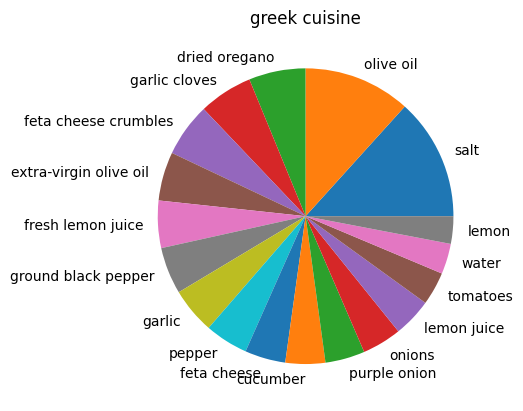

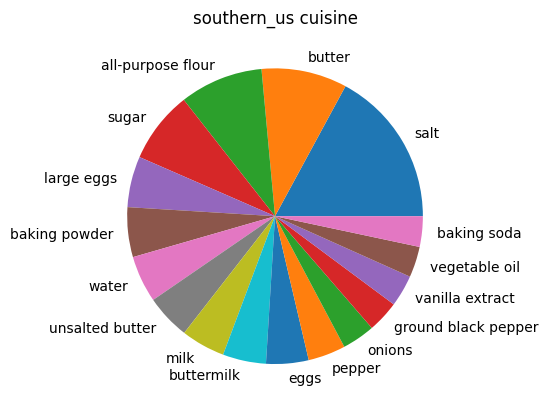

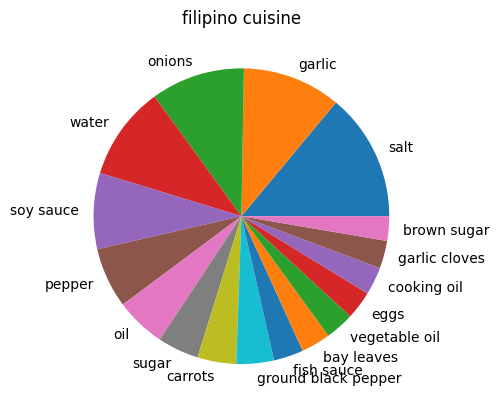

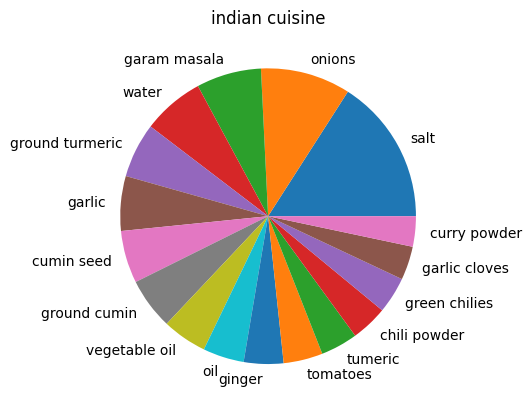

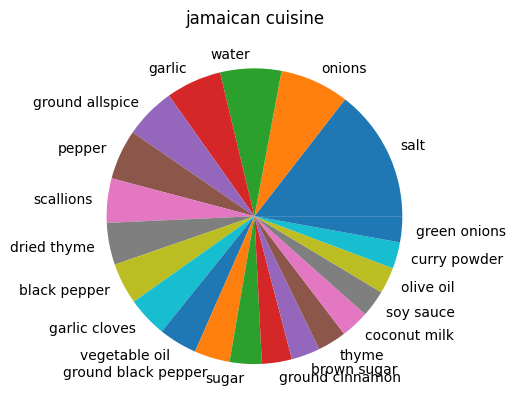

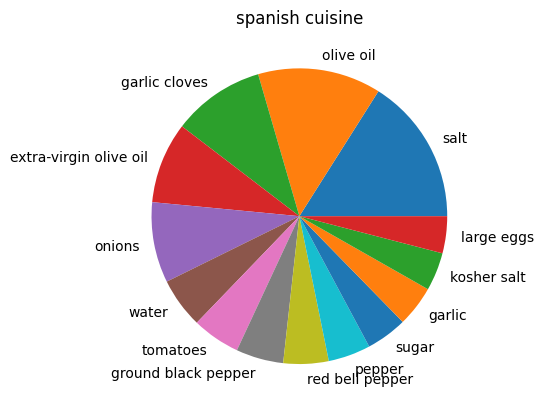

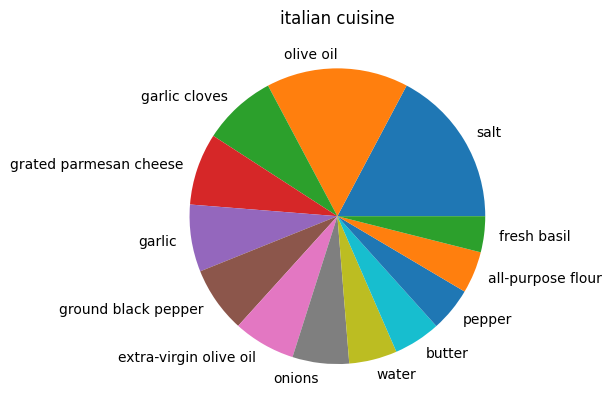

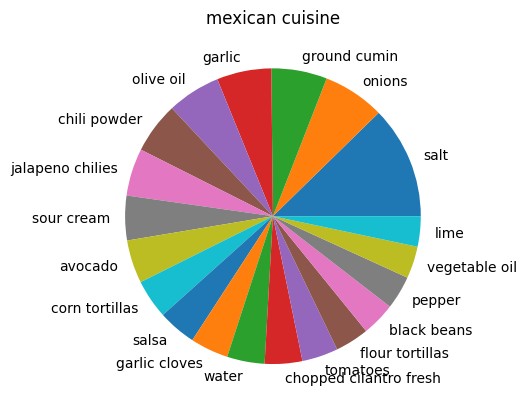

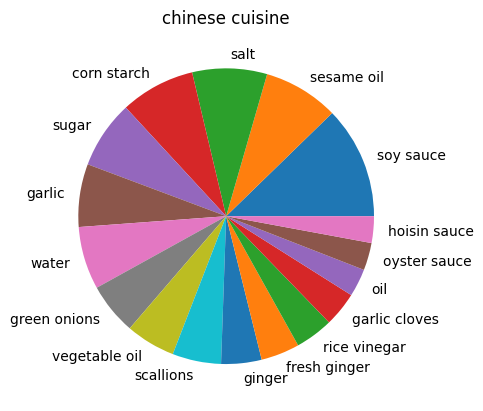

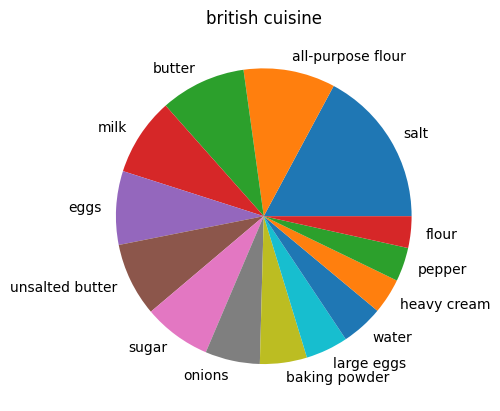

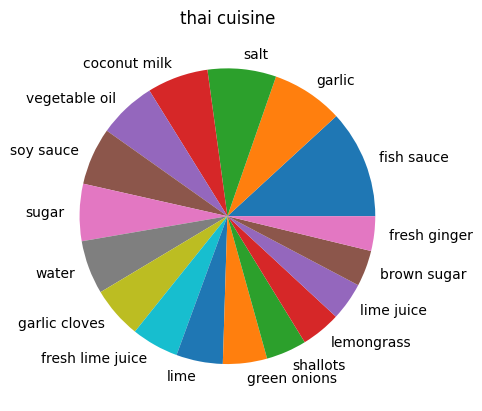

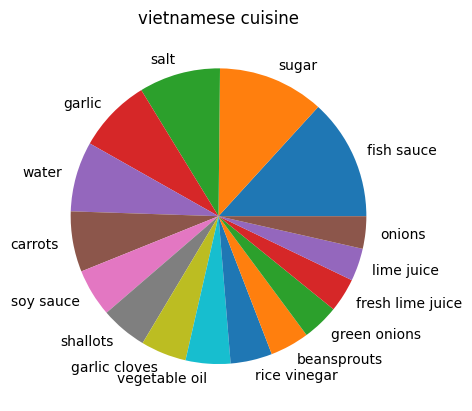

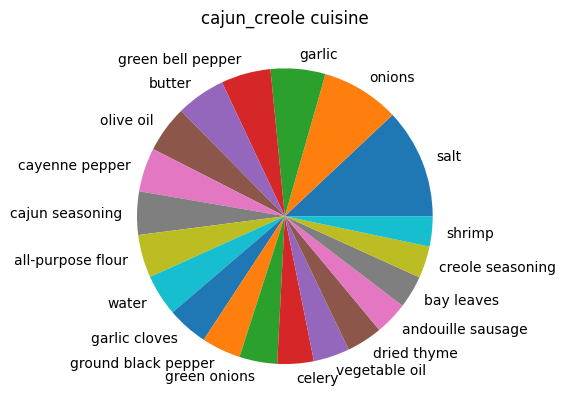

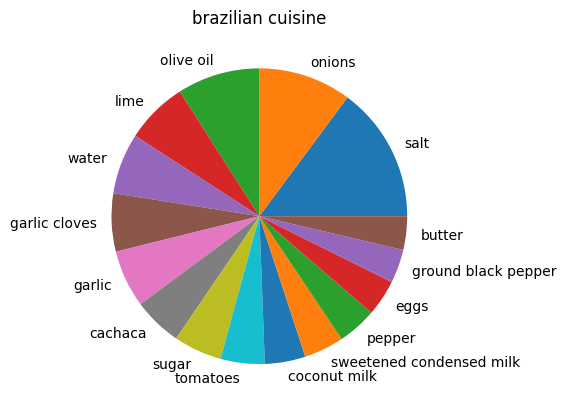

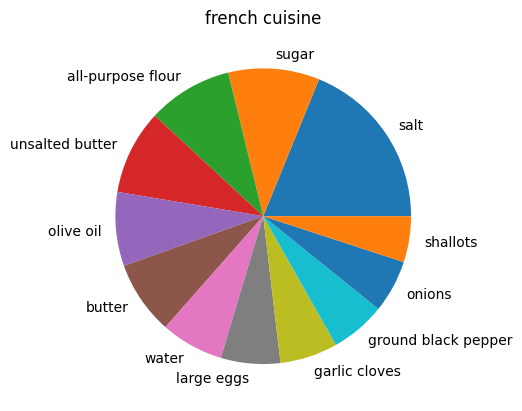

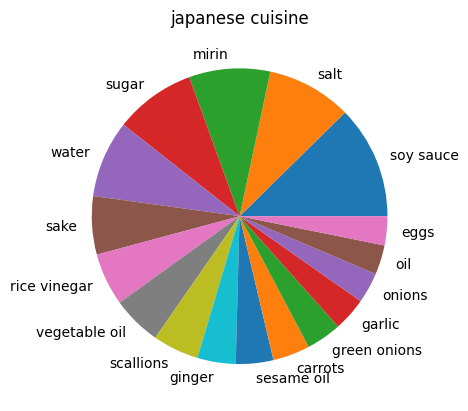

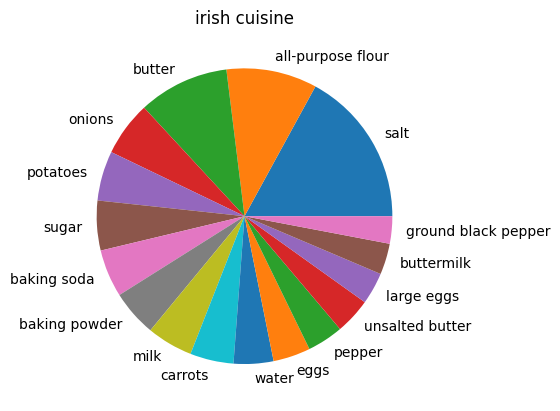

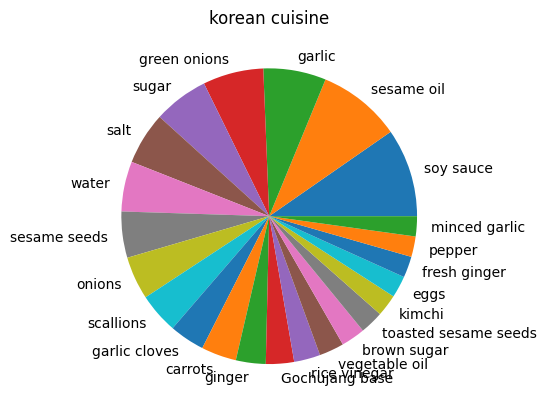

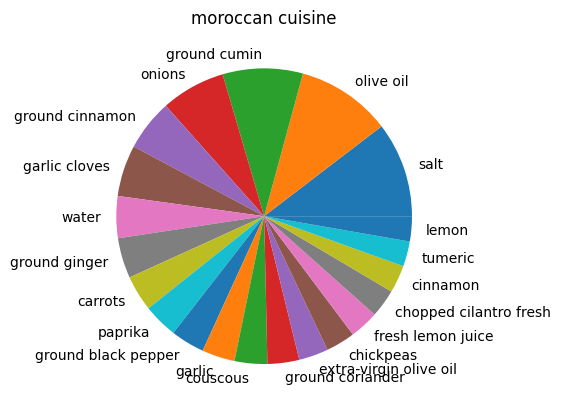

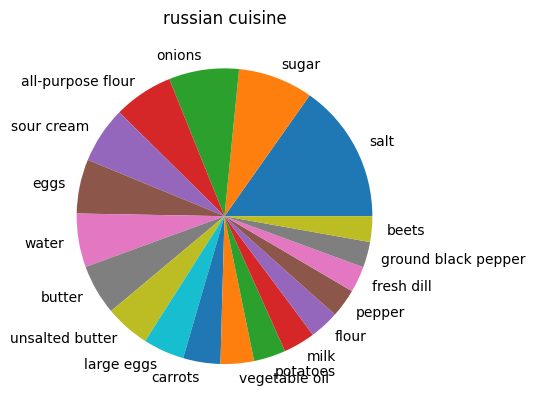

In [168]:
unique_cuisines = df.cuisine.unique()
for cuisine in unique_cuisines:
    fig, ax = plt.subplots(1, 1)
    tdf = df[df.cuisine == cuisine]
    tdf = tdf.drop('cuisine', axis=1)
    summed_df = tdf.sum()
    summed_df = summed_df.sort_values(ascending=False)
    summed_df = summed_df[(summed_df / summed_df.sum()) > 0.01]
    # summed_df = summed_df[0:10] # топ 10
    summed_df.plot.pie(ax=ax, title=f"{cuisine} cuisine")

# Encode labels

In [56]:
X = X_df.values
y = pd.get_dummies(y_df, dtype=int).values

print(X.shape)
print(y.shape)

(39774, 6714)
(39774, 20)


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
print('Train split:')
print(X_train.shape)
print(y_train.shape)
print('Test split:')
print(X_test.shape)
print(y_test.shape)

Train split:
(27841, 6714)
(27841, 20)
Test split:
(11933, 6714)
(11933, 20)


In [60]:
# Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<Axes: title={'center': 'PCA Component Explained Variances'}, xlabel='First n principal components', ylabel='Explained variance ratio of first n components'>

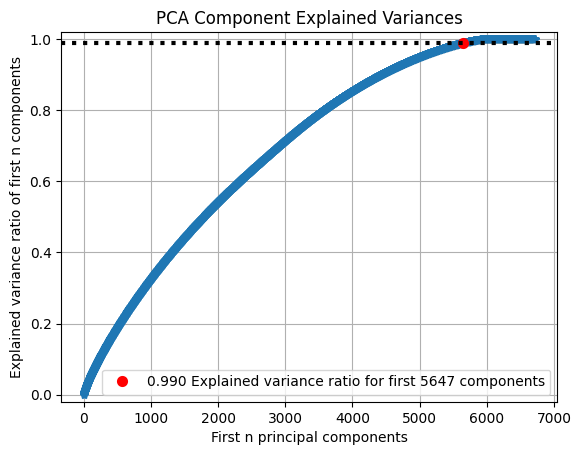

In [64]:
# PCA analysis
import scikitplot as skplot
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(X_train)
skplot.decomposition.plot_pca_component_variance(pca, target_explained_variance=0.99)

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np

pca = decomposition.PCA(n_components=5647)
lr = LogisticRegression(verbose=1)

pipeline = Pipeline(steps=[
    ('pca', pca),
    ('lr', lr)
])

pipeline.fit(X_train, np.argmax(y_train, axis=1))
pipeline.score(X_test, np.argmax(y_test, axis=1))

C:\Users\asedi\.conda\envs\cifar10\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.684823598424537

# Попробуем PyTorch

In [82]:
import torch
import torch.nn as nn
import torch.utils.data

In [116]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(np.argmax(y_train, axis=1)).long()
y_test = torch.from_numpy(np.argmax(y_test, axis=1)).long()

In [117]:
y_train.shape

torch.Size([27841])

In [118]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

In [124]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=256)

In [158]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Sequential(
            nn.Linear(in_features=6714, out_features=1024),
            nn.BatchNorm1d(num_features=1024),
            nn.Dropout(p=0.5),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(in_features=1024, out_features=256),
            nn.BatchNorm1d(num_features=256),
            nn.Dropout(p=0.5),
            nn.ReLU()
        )
        self.fc3 = nn.Sequential(
            nn.Linear(in_features=256, out_features=20),
            nn.BatchNorm1d(num_features=20)
        )

    def forward(self, x):
        return self.fc3(self.fc2(self.fc1(x)))

In [159]:
model = MyModel()
model

MyModel(
  (fc1): Sequential(
    (0): Linear(in_features=6714, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): ReLU()
  )
  (fc3): Sequential(
    (0): Linear(in_features=256, out_features=20, bias=True)
    (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [160]:
criterion = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=4e-3)

In [161]:
train_losses = []
test_losses = []
test_accuracies = []
num_epochs = 10
for ep in range(num_epochs):
    tr_losses = []
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_dataloader):
        # break
        y_preds = model(X_batch)
        loss = criterion(y_preds, y_batch)
        loss.backward()
        optim.step()
        optim.zero_grad()

        tr_losses.append(loss.item())

        if i % 10 == 0:
            print(f'Epoch {ep+1} / {num_epochs} Step {i+1} / {len(train_dataloader)} Train loss {np.array(tr_losses).mean()}')

    train_losses.append(np.mean(tr_losses))

    te_losses = []
    correct = 0
    total = 0
    model.eval()
    for i, (X_batch, y_batch) in enumerate(test_dataloader):
        y_preds = model(X_batch)
        loss = criterion(y_preds, y_batch)

        correct += (torch.argmax(y_preds, axis=1) == y_batch).sum().item()
        total += len(y_batch)
        te_losses.append(loss.item())

    test_losses.append(np.array(te_losses).mean())
    test_accuracies.append(correct / total)
    print(f'Epoch {ep+1} / {num_epochs} Test loss {np.array(te_losses).mean()} Test accuracy {correct / total}')
    print('='*40)

Epoch 1 / 10 Step 1 / 109 Train loss 3.4789562225341797
Epoch 1 / 10 Step 11 / 109 Train loss 2.283601479096846
Epoch 1 / 10 Step 21 / 109 Train loss 2.0311957711265203
Epoch 1 / 10 Step 31 / 109 Train loss 1.8840104841416883
Epoch 1 / 10 Step 41 / 109 Train loss 1.7778845763787992
Epoch 1 / 10 Step 51 / 109 Train loss 1.6942651365317551
Epoch 1 / 10 Step 61 / 109 Train loss 1.6283446433114224
Epoch 1 / 10 Step 71 / 109 Train loss 1.5728065413488468
Epoch 1 / 10 Step 81 / 109 Train loss 1.5249578614293793
Epoch 1 / 10 Step 91 / 109 Train loss 1.4809829618904617
Epoch 1 / 10 Step 101 / 109 Train loss 1.4469627525546762
Epoch 1 / 10 Test loss 0.9545664673155927 Test accuracy 0.7768373418251906
Epoch 2 / 10 Step 1 / 109 Train loss 0.7868929505348206
Epoch 2 / 10 Step 11 / 109 Train loss 0.8082067424600775
Epoch 2 / 10 Step 21 / 109 Train loss 0.8024199661754426
Epoch 2 / 10 Step 31 / 109 Train loss 0.8009642497185738
Epoch 2 / 10 Step 41 / 109 Train loss 0.7957115347792463
Epoch 2 / 10 St

C:\Users\asedi\AppData\Local\Temp\ipykernel_13204\3760364720.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


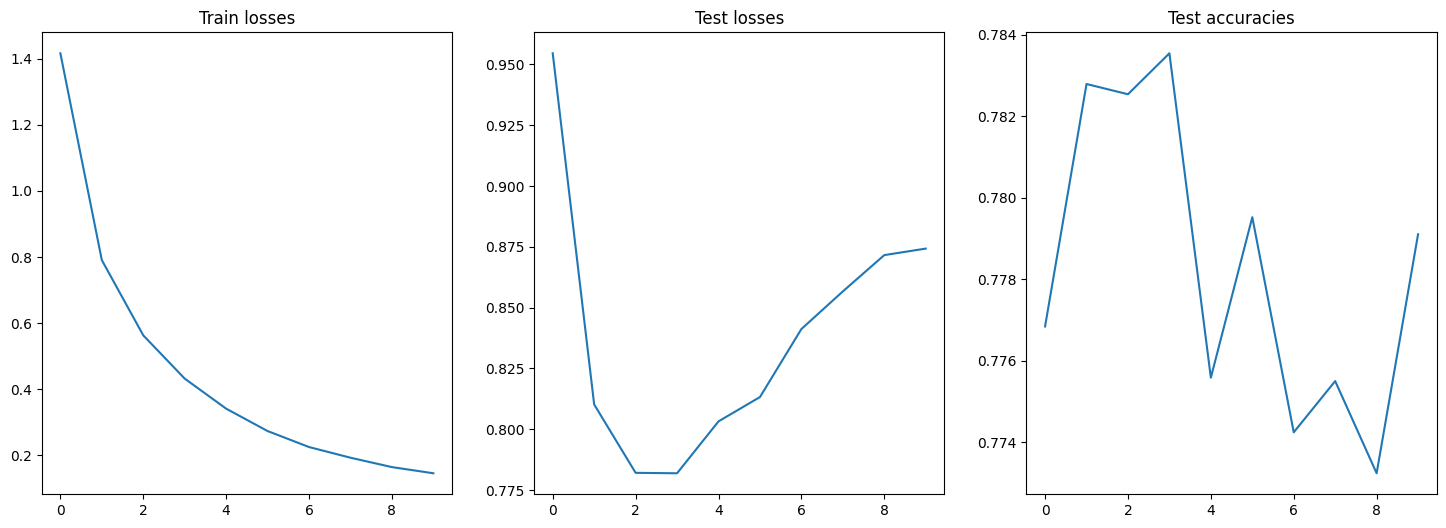

In [162]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].plot(range(num_epochs), train_losses, label='train losses')
axs[0].set_title('Train losses')
axs[1].plot(range(num_epochs), test_losses, label='test losses')
axs[1].set_title('Test losses')
axs[2].plot(range(num_epochs), test_accuracies, label='test accuracies')
axs[2].set_title('Test accuracies')
fig.show()